<span style="font-size:30px">**Filtros de dominio espacial, parte 1: Filtro de mediana.**</span> 
    
<span style="font-family: 'Verdana'; color: red;"> *Bronquivoide* </span>

# Antecedentes:

### Cuando tenemos ruido presente en una imagen, podemos describir el sistema de acuerdo a la siguiente ecuación:

<font size="5"> $ g(x,y)=f(x,y)+\eta (x,y)$</font>

### La función $g(x,y)$ representa a una señal alterada por ruido, formada analíticamente por la adición de la función $f$ que representa a la imagen sin ruido (la imagen ideal) con la función $\eta$ que describe al ruido.

### En el proceso de restauración de imagen, tenemos que considerar cómo una imagen de entrada ha sido degradada, deteriorada o corrompida. Para ello se trabaja con un modelo de degradación que describe cómo se ha deteriorado una imagen de entrada $f(x,y)$ en términos de un operador de degradación $H$ y del ruido aditivo $\eta (x,y)$ para producir una imagen degradada de salida $g(x,y)$.

### Escribimos la ecuación que modela el proceso de degradación como:

<font size="5"> $ g(x,y)=H[f(x,y)]+\eta (x,y)$</font>

### La función de degradación, $H$, es un operador lineal espacialmente invariante. (La invariancia espacial se refleja en la ecuación: Si $\eta=0$, $H[f(x-a,y-b)]=g(x-a,x-b)$, es decir, la salida solo depende del valor de la entrada en un punto, no como tal del punto).

### Comunmente en el caso de funciones de degradación espacialmente invatiantes, se define $H=h(x,y)\diamond$, en donde $h$ es la representación de la transformación lineal de degradación en una base de posiciones y $\diamond$ es el operador de convolución. Por lo que bajo esta descripción, se modela el sistema mediante la siguiente ecuación:

<font size="5"> $ g(x,y)=h(x,y)\diamond f(x,y)+\eta (x,y)$</font>

### Para la parte de la restauración se considera una transformación sobre la imagen degradada:

<font size="5"> $ T[g(x,y)]=\hat{f}(x,y)$</font>

### En donde $T$ corresponde a un filtro que opera sobre la imagen degradada para arrojar una imagen que es una imagen estimada de la original o de la ideal, $\hat{f}(x,y) \approx f(x,y)$.

# Introducción:

### En este notebook nos vamos a enfocar en el caso particular en que la transformación $T$ corresponde al mapeo asociado a un filtro de mediana. Se toma como punto de partida el notebook sobre convolución en imágenes y el repositorio de procesamiento de señales, particularmente las partes de convolución y filtros (https://github.com/Bronquivoide/Signal-Proccesing-con-Python/tree/main).

### Sea $g(x,y)$ la imagen degradada definida en una vecindad consistente en el área $A_{x\times y}$ de un rectángulo de $x \times y$. El filtro de mediana es una transformación que reemplaza el valor asociado a un pixel $p$ de $g$ por la mediana del conjunto de intensidades asociados a la vecindad de $p$. Esto es:

### <font size="5"> $ \hat{f}(x,y)=med[g(x,y)]$, $\forall (s,t) \in A_{x\times y} $</font>

### El filtro de mediana se utiliza especialmente para remover el ruido conocido como *sal y pimienta*, cuya distribución de probabilidades está descrita mediante la siguiente función de densidad:

<font size="5"> $ 
P(z) = 
\begin{cases} 
P_a & \text{, si } z=a \\
P_b & \text{, si } z=b \\
0 & \text{, en cualquier otro caso}
\end{cases}
$ </font>

### En donde $z$ es la magnitud de las intensidades $I(x,y)$.

### Si $b>a$ se tiene que la intensidad $b$ se verá como un puntito claro en la imagen, mientras que si $a>b$, se verá como un puntito oscuro. Se le llama sal y pimienta a este tipo de ruido por la distribución aleatoria de puntitos claros y oscuros y su parecido con granos de sal y pimienta.

# Ejercicio:

### Generar ruido tipo sal y pimienta sobre la imagen *Lena.tif*, posteriormente implementar un filtro de mediana para la eliminación del ruido.

### Para generar el ruido usaremos la función *random_noise* de la librería scikit-image.

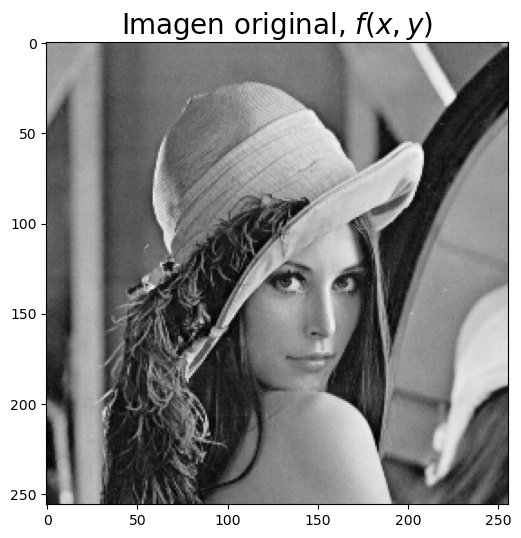

El formato de los datos del arreglo asociado a la imagen con ruido es float64. Tenemos un formato de intensidad continua en [0,1].

Queremos el formato uint8 con un rango de intensidades discreto en [0,255]:


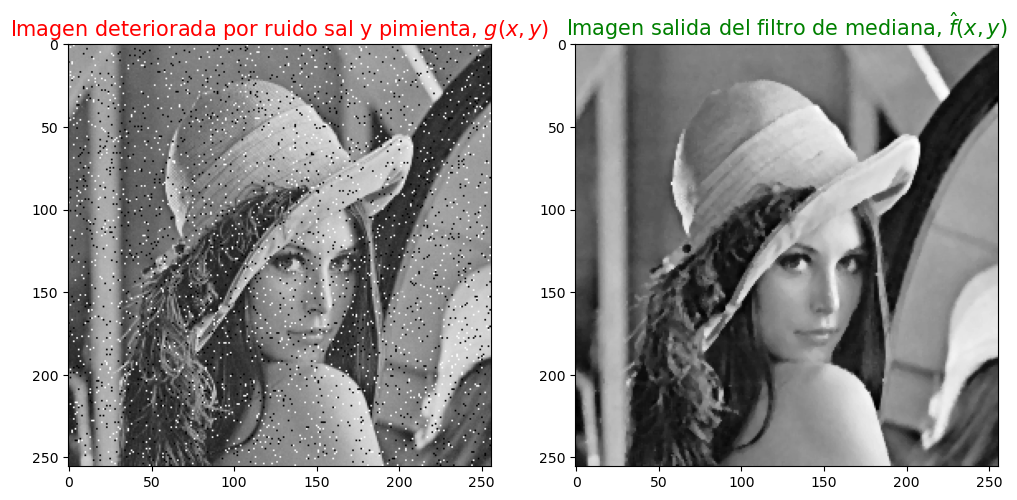

In [31]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage.util import random_noise

#Display de imagen:
imagen_original=cv2.imread('Lena.tif', 0)
plt.figure(figsize=(12,6))
plt.imshow(imagen_original, cmap = 'gray')
plt.title(r"Imagen original, $f(x,y)$",fontsize=20)
plt.show()

# Ruido aditivo sal y pimienta:
ruido=random_noise(imagen_original, mode='s&p',amount = 0.05) # mode='s&p' corresponde al tipo salt-and-pepper
print(f"El formato de los datos del arreglo asociado a la imagen con ruido es {ruido.dtype}. Tenemos un formato de intensidad continua en [0,1].")
print()
print(f"Queremos el formato uint8 con un rango de intensidades discreto en [0,255]:")
imagen_ruido=np.array(255*ruido, dtype = 'uint8')

# Implementación del filtro de mediana:
imagen_filtrada=cv2.medianBlur(imagen_ruido, 3) # 3 size of median kernel
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.imshow(imagen_ruido, cmap = 'gray')
plt.title(r"Imagen deteriorada por ruido sal y pimienta, $g(x,y)$", fontsize = 15,color="r")
plt.subplot(1,2,2)
plt.imshow(imagen_filtrada, cmap = 'gray')
plt.title(r"Imagen salida del filtro de mediana, $\hat{f}(x,y)$", fontsize = 15,color="g")
plt.show()


# Fin del ejercicio:
### Bibliografía recomendada:

### $\blacksquare$ Gonzalez, R. C., & Woods, R. E. (2008). Digital image processing (3rd ed.). Pearson.

### $\blacksquare$ Acharya, T., & Ray, A. K. (2005). Image processing: Principles and applications. Wiley-Interscience.